In [1]:
############### PART 1 ###################

# IMPORTING MODULES 
#import ruamel.yaml
from pynwb import TimeSeries
from datetime import datetime
from dateutil.tz import tzlocal
from pynwb import NWBFile
import numpy as np
from pynwb import NWBHDF5IO
import h5py
from pynwb import h5py
import pynwb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import seaborn as sns
import math
from scipy import stats
import scipy.signal
from scipy.ndimage import gaussian_filter
from scipy.ndimage.filters import gaussian_filter1d
import os, sys
import scipy
from scipy.stats.stats import pearsonr
#import importnb
import pickle 
import statsmodels.api as sm


#Importing all the external functions that are saved in another ipynb. IMPORTANT: Alme_functions must be .ipynb
import nbimporter
from Animal_to_animal_functions import *

# Definings a project and data directory
proj_dir = './Data/'
data_dir = os.listdir(proj_dir)
data_dir = sorted(data_dir)

# Part 1: Dot Products

- the first cell calculates dot products for individual animals 
- the second cell averaged the dot products across animals 

17894
18237
19251


<ipython-input-5-4ea48ce21351>:32: RuntimeWarning: invalid value encountered in true_divide
  pv_plot[row] = pv_plot[row]/np.nanmax(pv_plot[row])


17769
18024


<Figure size 432x288 with 0 Axes>

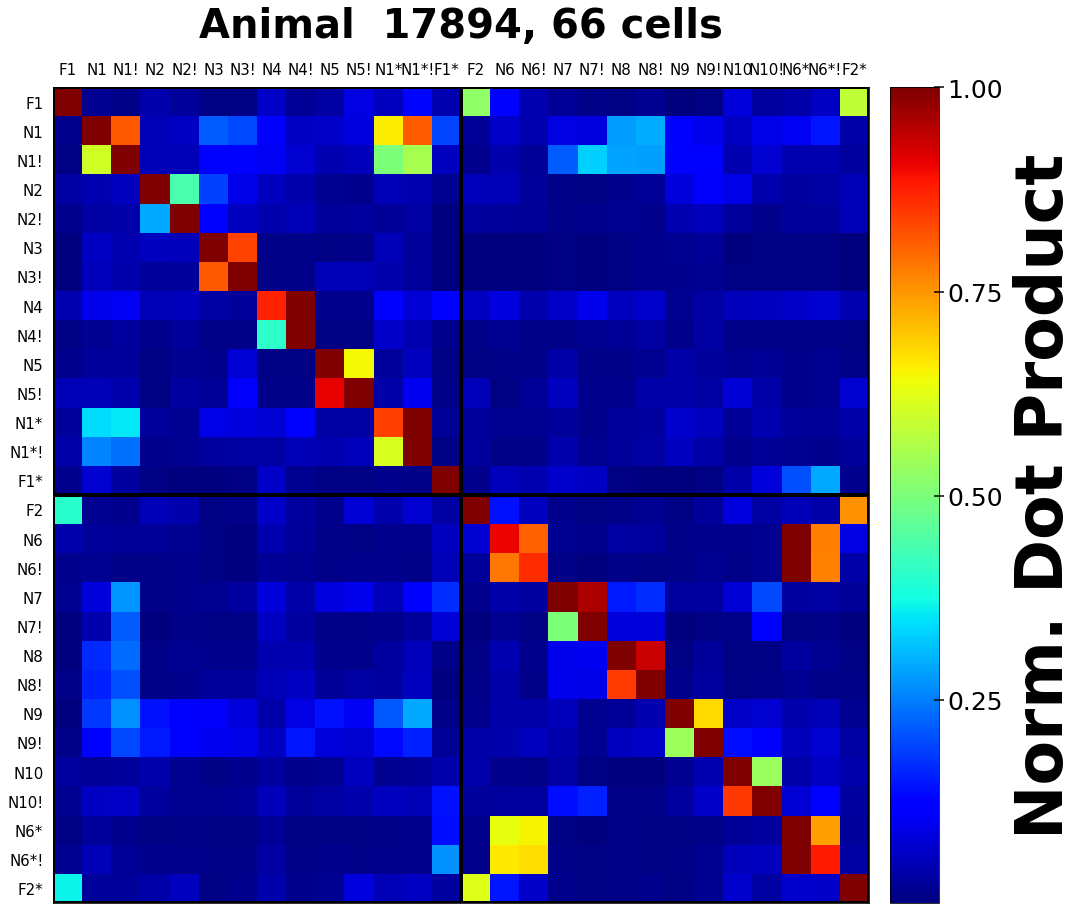

<Figure size 432x288 with 0 Axes>

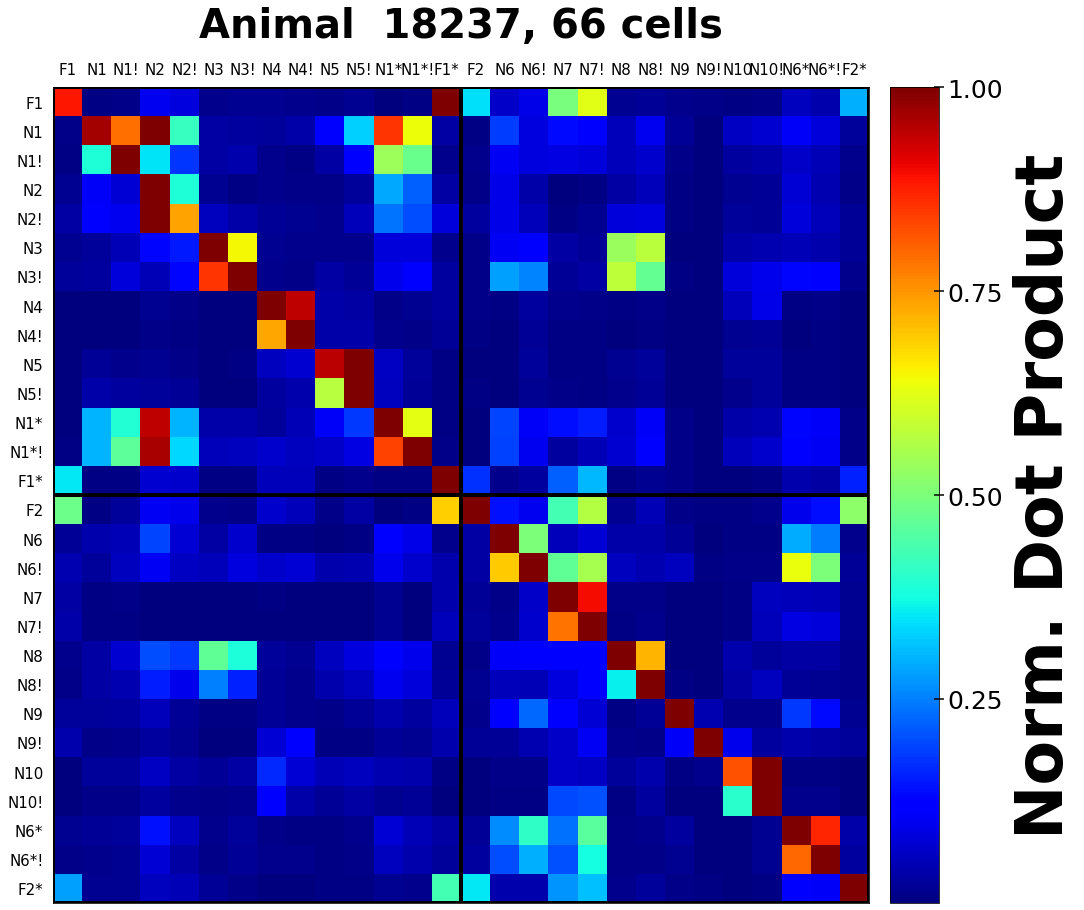

<Figure size 432x288 with 0 Axes>

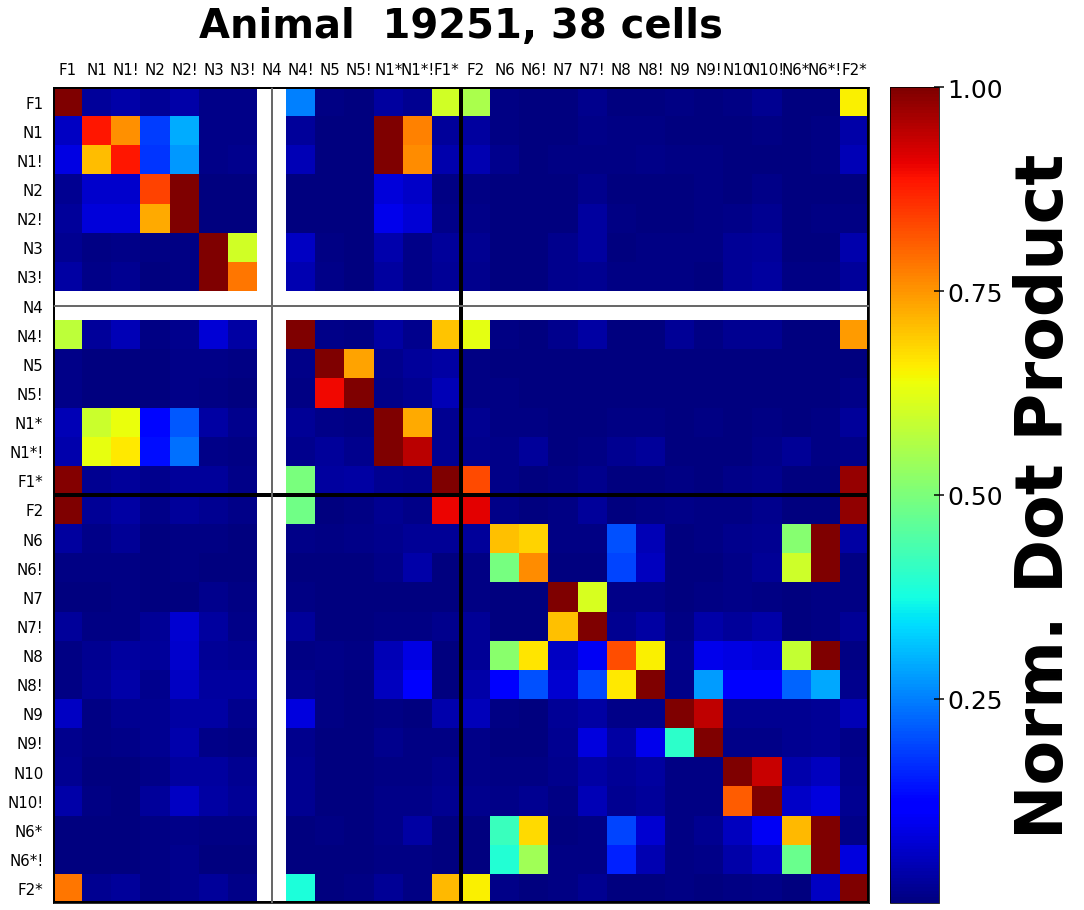

<Figure size 432x288 with 0 Axes>

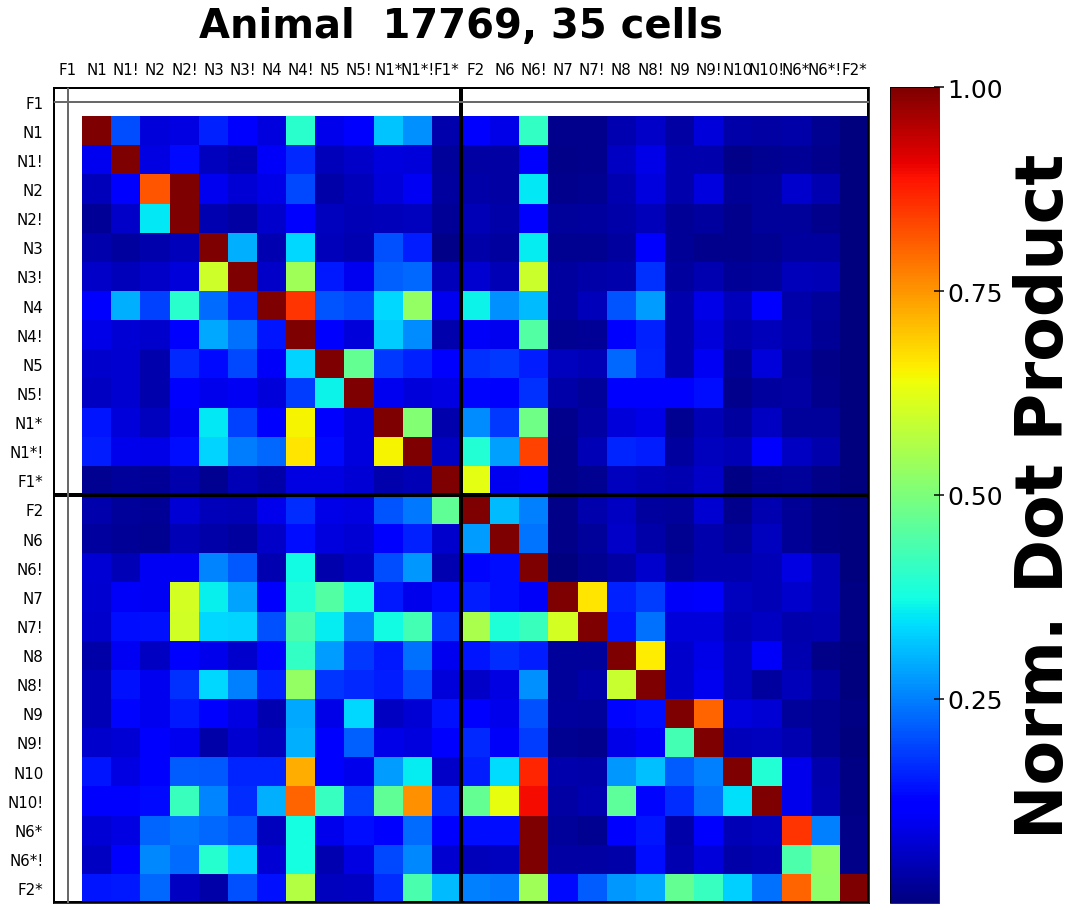

<Figure size 432x288 with 0 Axes>

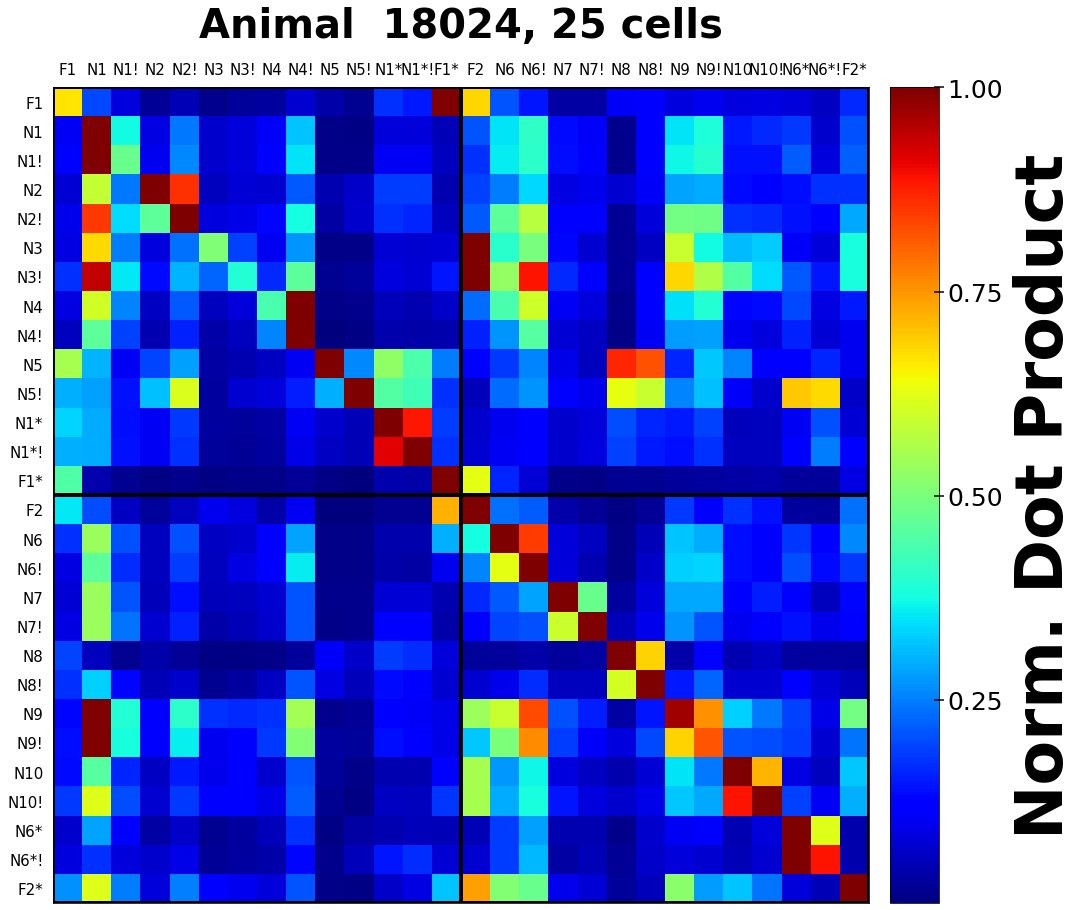

In [5]:
animal_list = ['17894', '18237', '19251', '17769','18024']  
num_cell_animal = {'17894':66, '18237': 66, '19251': 38, '17769': 35,'18024': 25}
rate_maps = {}


for animal in animal_list:
    infile = open('rate_maps_' + animal,'rb')               #import the correct data
    rate_maps[animal] = pickle.load(infile)
    infile.close()


for animal in animal_list: 
    num_cell = num_cell_animal[animal]
    print(animal)
    
    env_x = rate_maps[animal].keys()
    env_y = rate_maps[animal].keys()
    
    pv_plot = np.nan*np.ndarray(shape = (len(env_x),len(env_y)))    
    y=-1
    x=0
    for s1 in env_y:                      #s1 = session 1
        y=y+1
        x=0
        for s2 in env_x:                  #s2 = session 2
            pv_plot[y, x] = np.nanmean(pv_dot(rate_maps[animal][s1], rate_maps[animal][s2]))
            x=x+1
            
            
            
    for row in range(len(env_y)): 
        pv_plot[row] = pv_plot[row]/np.nanmax(pv_plot[row])
    
    
    ###Remove the missing data 
    if animal == '17769': 
        pv_plot[0,:] = np.nan
        pv_plot[:,0] = np.nan
        
    if animal == '19251': 
        pv_plot[7,:] = np.nan
        pv_plot[:,7] = np.nan
        
    
    
    plt.figure()
    fig, ax = plt.subplots(figsize=(15,15))
    im = ax.imshow(pv_plot, cmap='jet')
    plt.title('Animal  '+ animal +', ' +str(num_cell) + ' cells',size=40, fontweight='bold', pad =25)
    #plt.title('Rat = '+ animal +', '+'n = ' +str(num_cell) + ' cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
    ax.set_xticks(np.arange(len(env_x)))
    ax.set_yticks(np.arange(len(env_y)))
    ax.xaxis.tick_top()
    ax.set_xticklabels(env_x, fontsize = 15, color = 'black')
    ax.set_yticklabels(env_y,  fontsize = 15, color = 'black')
    ax.tick_params(length = 0, pad=10)
    ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
    ax.axhline(y=13.5, xmin=-1, xmax=12, color ='black', linewidth=4)   
    ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
    ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)   
    ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
    ax.axhline(y=27.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
    cb_ax = fig.add_axes([0.91, 0.125, 0.045, 0.755])
    cbar = fig.colorbar(im, cax=cb_ax, ticks = [0,0.25,0.5,0.75, 1]).set_label('Norm. Dot Product',size=65, color = 'black',
                                                                                     labelpad=10, fontweight="bold")
    plt.tick_params(axis = 'y', length = 10, width= 1.5, direction='inout', labelsize=25) 

    if animal == '17490':
        ax.axvline(x=2., ymin=-1, ymax=12, color ='red', linewidth=1)  #left
        ax.axhline(y=2., xmin=-1, xmax=12, color ='red', linewidth=1)  #top 
        ax.axvline(x=10, ymin=-1, ymax=12, color ='red', linewidth=1)  #right
        ax.axhline(y=10, xmin=-1, xmax=12, color ='red', linewidth=1)  #bottom 

    if animal == '17769': 
        ax.axvline(x=0., ymin=-1, ymax=12, color ='dimgrey', linewidth=2)
        ax.axhline(y=0., xmin=-1, xmax=12, color ='dimgrey', linewidth=2)
        pv_plot[0,:] = np.nan
        pv_plot[:,0] = np.nan
        
    
    if animal == '19251': 
        ax.axvline(x=7., ymin=-1, ymax=12, color ='dimgrey', linewidth=2)
        ax.axhline(y=7., xmin=-1, xmax=12, color ='dimgrey', linewidth=2)
    
    save_fig = False
    if save_fig:
        pickle_out = open('dot_pl_' + animal, 'wb')      
        pickle.dump(pv_plot, pickle_out)
        pickle_out.close()
        plt.savefig('dp_plot_'+animal, dpi=300, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

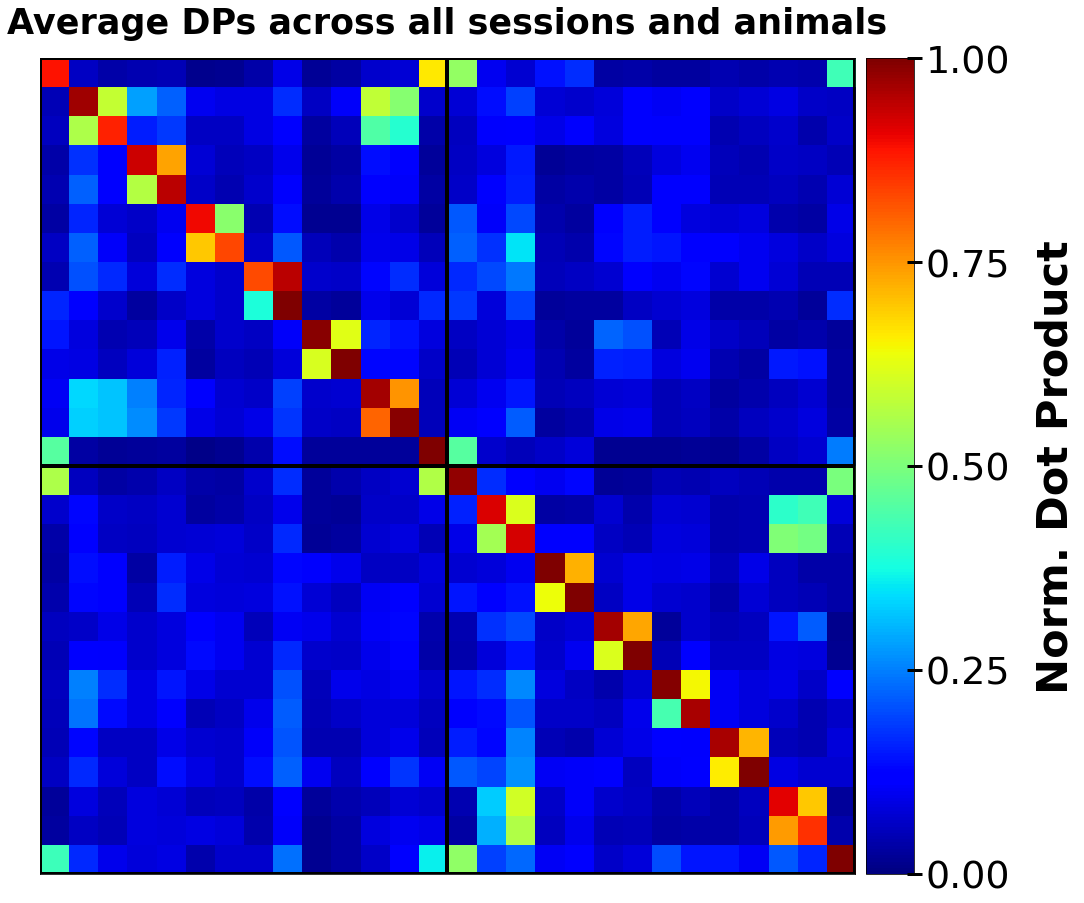

In [4]:
animal_list_dp = ['17894', '18237', '19251', '17769','18024']    #animals 
infile_list_dp = {}                                               

for an in animal_list_dp:
    infile = open('dot_pl_' + an,'rb')            #import the correct data
    infile_list_dp[an] = pickle.load(infile)
    infile.close()
    
    
    
mat1 = infile_list_dp['17894']                               
mat2 = infile_list_dp['18237']
mat3 = infile_list_dp['19251']
mat4 = infile_list_dp['17769']
mat5 = infile_list_dp['18024']

order_x = list(rate_maps['17894'].keys())                          
order_y = list(rate_maps['17894'].keys())
plot = corr_average(mat1, mat2, mat3, mat4, mat5)   
plt.figure()
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(plot, cmap='jet', vmin=0, vmax=1)
plt.title('Average DPs across all sessions and animals',size=35, fontweight='bold', pad =25)
#plt.title('Rat = 18024,  n = 25 cells', size=15, pad =25, color='black', fontweight='bold', loc='left')
#ax.set_xticks(np.arange(len(order_x)))
#ax.set_yticks(np.arange(len(order_y)))
ax.set_xticks([])
ax.set_yticks([])
ax.xaxis.tick_top()
#ax.set_xticklabels(order_x, fontsize = 15, color = 'black')
#ax.set_yticklabels(order_y,  fontsize = 15, color = 'black')
#ax.tick_params(length = 0, pad=10)
ax.axvline(x=13.5, ymin=-1, ymax=12, color ='black', linewidth=4)   
ax.axhline(y=13.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=-0.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=-0.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
ax.axvline(x=27.5, ymin=-1, ymax=12, color ='black', linewidth=4)  
ax.axhline(y=27.5, xmin=-1, xmax=12, color ='black', linewidth=4)  
cb_ax = fig.add_axes([0.90, 0.125, 0.045, 0.755])
cbar = fig.colorbar(im, cax=cb_ax, ticks = [0,0.25,0.5,0.75,1]).set_label('Norm. Dot Product',size=43, color = 'black',
                                                                                     labelpad=25, fontweight="bold")
plt.tick_params(axis = 'y', length = 15, width= 3, direction='inout', labelsize=38) 
#plt.savefig('dp_aver_2020_final', dpi=300, bbox_inches='tight')

# Part 2: GLMs with dot products 

- for details on what happens in the following 6 cells consult the main code 
- essentially, we recreate figure 7 but this time using dot products instead of RMCs

In [6]:
animal_list_dp = ['17894', '18237', '19251', '17769','18024']    #animals 
infile_list_dp = {}                                              
for an in animal_list_dp:
    infile = open('dot_pl_' + an,'rb')                           #import the correct dot product data 
    infile_list_dp[an] = pickle.load(infile)
    infile.close()

 
    
    
f_ind = {0:  [13,14,27],                                       #Defining indeces that correspind to the correlation coeff for rep. of F 
         13: [14,27],                                          #0=F1, 13=F1*, 14=F2, 27= F2*
         14: [27]}     

f_corr_dict_all_dp = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for f correlation coefficients Keys:animal,values:corr_coeff for repetitions of f

for animal in animal_list_dp:                                                     #For each animal 
    for x in f_ind:                                                               #For each f session 
        for y in f_ind[x]:                                                        #For each repetition
            f_corr_dict_all_dp[animal].append(infile_list_dp[animal][x][y])       #Add the coeff to the f_corr_dict


n1_ind = {1:  [11,12],                                          #Defining indeces that correspind to the correlation coeff for rep. of N1 
          2:  [11,12]}                                          #1=N1, 2=N1!, 11=N1*, 12= N1*!
    

n1_dict_dp = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}  
n6_dict_dp = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}  
n_corr_dict_all_dp = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for f correlation coefficients Keys:animal,values:corr_coeff for repetitions of f

for animal in animal_list_dp:                                                     #For each animal 
    for x in n1_ind:                                                              #If the index is one we are interested in 
        for y in n1_ind[x]:     
            n_corr_dict_all_dp[animal].append(infile_list_dp[animal][x][y])
            n1_dict_dp[animal].append(infile_list_dp[animal][x][y])              #Add the correlation coefficient to the dict
            
            
n6_ind = {15:  [25,26],                                         #Defining indeces that correspind to the correlation coeff for rep. of N1 
          16:  [25,26]}                                         #15=N6, 16=N6!, 25=N6*, 26=N6*!

for animal in animal_list_dp:                                      
    for x in n6_ind:    
        for y in n6_ind[x]:     
            n_corr_dict_all_dp[animal].append(infile_list_dp[animal][x][y])
            n6_dict_dp[animal].append(infile_list_dp[animal][x][y]) 
            


f_corr_tot_all_dp = []                                             #Put all f correlations in one list, removing nans 
n_corr_tot_all_dp = []                                             #Put all n correlations in one list, removing nans 

for animal in f_corr_dict_all_dp: 
    for i in f_corr_dict_all_dp[animal]:
        if not math.isnan(i):
            f_corr_tot_all_dp.append(i)

for animal in n_corr_dict_all_dp: 
    for i in n_corr_dict_all_dp[animal]: 
        n_corr_tot_all_dp.append(i)           



        
#print(n_corr_tot_all_dp)
#print(len(n_corr_tot_all_dp))
#print(stats.shapiro(f_corr_tot_all_dp))
#print(stats.shapiro(n_corr_tot_all_dp))
#print(stats.anderson(f_corr_tot_all_dp,dist='norm'))
#print(stats.anderson(n_corr_tot_all_dp,dist='norm'))
#print(stats.ttest_ind(f_corr_tot_all_dp, n_corr_tot_all_dp, axis=0, equal_var=True, nan_policy='omit')) #Do the t test 

In [7]:
#Very important cell: calculates the mean F and N corr for each animal and puts them in dicts. 

mean_f_corr_dp = {}
f_corr_error_dp = {}
mean_n1_corr_dp = {}
n1_corr_error_dp ={}
mean_n6_corr_dp = {}
n6_corr_error_dp ={}
mean_n_corr_all_dp = {}
n_corr_all_error_dp = {}

for animal in animal_list:
    mean_f_corr_dp[animal] = np.nanmean(f_corr_dict_all_dp[animal])
    f_corr_error_dp[animal]= np.nanstd(f_corr_dict_all_dp[animal])/np.sqrt(len(f_corr_dict_all_dp[animal]))
    
for animal in animal_list:
    mean_n1_corr_dp[animal] = np.mean(n1_dict_dp[animal])
    n1_corr_error_dp[animal]= np.nanstd(n1_dict_dp[animal])/np.sqrt(len(n1_dict_dp[animal]))
    
    
for animal in animal_list:
    mean_n6_corr_dp[animal] = np.mean(n6_dict_dp[animal]) 
    n6_corr_error_dp[animal]= np.nanstd(n6_dict_dp[animal])/np.sqrt(len(n6_dict_dp[animal]))
    
for animal in animal_list:
    mean_n_corr_all_dp[animal] = np.mean(n_corr_dict_all_dp[animal]) 
    n_corr_all_error_dp[animal]= np.nanstd(n_corr_dict_all_dp[animal])/np.sqrt(len(n_corr_dict_all_dp[animal]))
    
print(mean_n_corr_all_dp)
print(mean_f_corr_dp)

{'17894': 0.7589487780525697, '18237': 0.5240986484177167, '19251': 0.8306864732741082, '17769': 0.11461790650987651, '18024': 0.1255637540897782}
{'17894': 0.3241431206421664, '18237': 0.41650883049451276, '19251': 0.767792314809781, '17769': 0.2093506566816634, '18024': 0.4675883993258341}


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.068   
Dependent Variable: y                AIC:                4.4873  
Date:               2021-12-09 15:45 BIC:                3.7062  
No. Observations:   5                Log-Likelihood:     -0.24367
Df Model:           1                F-statistic:        1.290   
Df Residuals:       3                Prob (F-statistic): 0.339   
R-squared:          0.301            Scale:              0.10757 
--------------------------------------------------------------------
         Coef.     Std.Err.      t       P>|t|      [0.025    0.975]
--------------------------------------------------------------------
const    0.0820      0.3724    0.2202    0.8398    -1.1033    1.2673
x1       0.8895      0.7833    1.1356    0.3386    -1.6032    3.3822
-----------------------------------------------------------------
Omnibus:              nan          Durbin-Watson:           0.609
Prob(Omnibus

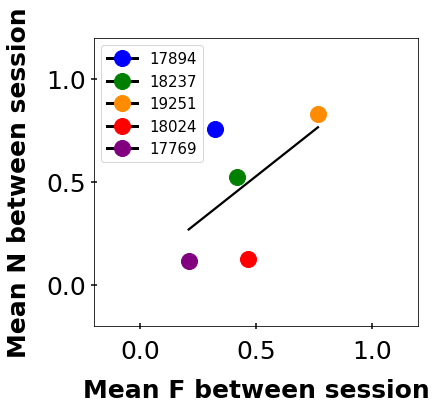

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024', '17769']    

ax.plot(mean_f_corr_dp['17894'], mean_n_corr_all_dp['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(mean_f_corr_dp['18237'], mean_n_corr_all_dp['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(mean_f_corr_dp['19251'], mean_n_corr_all_dp['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(mean_f_corr_dp['18024'], mean_n_corr_all_dp['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(mean_f_corr_dp['17769'], mean_n_corr_all_dp['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')

ax.set_ylabel('Mean N between session',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean F between session',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.legend(loc='upper left', prop={'size':15})

x = np.array(list(mean_f_corr_dp.values())).reshape((-1, 1))
y = np.array(list(mean_n_corr_all_dp.values()))

mod = sm.OLS(y,sm.add_constant(x))
fii = mod.fit()
print(fii.summary2())

sns.regplot(x,y,  ci=None, color= 'black')
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)



print(scipy.stats.linregress(np.array(list(mean_f_corr_dp.values())),np.array(list(mean_n_corr_all_dp.values()))))
#plt.savefig('corr_f_n_dp', dpi=300, bbox_inches='tight')

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.660   
Dependent Variable: y                AIC:                0.3361  
Date:               2021-12-09 15:46 BIC:                -0.4450 
No. Observations:   5                Log-Likelihood:     1.8319  
Df Model:           1                F-statistic:        8.766   
Df Residuals:       3                Prob (F-statistic): 0.0595  
R-squared:          0.745            Scale:              0.046896
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const      -0.0105     0.1852   -0.0569   0.9582   -0.6000   0.5790
x1          0.9647     0.3258    2.9607   0.0595   -0.0723   2.0016
-----------------------------------------------------------------
Omnibus:              nan          Durbin-Watson:           1.956
Prob(Omnibus):   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.2, 1.2)

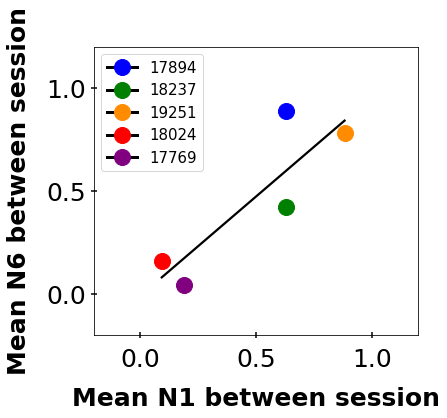

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024', '17769']    

ax.plot(mean_n1_corr_dp['17894'], mean_n6_corr_dp['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(mean_n1_corr_dp['18237'], mean_n6_corr_dp['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(mean_n1_corr_dp['19251'], mean_n6_corr_dp['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(mean_n1_corr_dp['18024'], mean_n6_corr_dp['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(mean_n1_corr_dp['17769'], mean_n6_corr_dp['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')

ax.set_ylabel('Mean N6 between session',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean N1 between session',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)

ax.legend(loc='upper left', prop={'size':15})

x3 = np.array(list(mean_n1_corr_dp.values())).reshape((-1, 1))
y3 = np.array(list(mean_n6_corr_dp.values()))

mod = sm.OLS(y3,sm.add_constant(x3))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
print(fii.pvalues[0])

sns.regplot(x3,y3,  ci=None, color= 'black')
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)


#plt.savefig('corr_n_n_dp', dpi=300, bbox_inches='tight')

In [11]:
comp_within = {'N1': ['N1!'],
               'N2': ['N2!'],
               'N3': ['N3!'], 
               'N4': ['N4!'],
               'N5': ['N5!'],
               'N6': ['N6!'],
               'N7': ['N7!'],  
               'N8': ['N8!'], 
               'N9': ['N9!'],
              'N10': ['N10!']}

comp_between = {'N1':  ['N1*', 'N1*!'],
                'N1!': ['N1*', 'N1*!'],
                'N6':  ['N6*', 'N6*!'],
                'N6!': ['N6*', 'N6*!']}

comp_f = {'F1':  ['F1*', 'F2', 'F2*'],
          'F1*': ['F2', 'F2*'],
          'F2':  ['F2*']}

       
within_session_dp = {}
between_session_dp = {}
f_co_dp = {}
    
for animal in animal_list: 
    within_session_dp[animal] = np.nanmean(get_corr_coeff(comp_within, infile_list_dp[animal]))
    between_session_dp[animal] = np.nanmean(get_corr_coeff(comp_between, infile_list_dp[animal]))
    f_co_dp[animal] = np.nanmean(get_corr_coeff(comp_f, infile_list_dp[animal]))

0.9517084697410566
                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.936    
Dependent Variable: y                AIC:                -8.8773  
Date:               2021-12-09 15:51 BIC:                -9.6584  
No. Observations:   5                Log-Likelihood:     6.4386   
Df Model:           1                F-statistic:        59.12    
Df Residuals:       3                Prob (F-statistic): 0.00457  
R-squared:          0.952            Scale:              0.0074279
--------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const      -1.9613     0.3186   -6.1552   0.0086   -2.9754   -0.9473
x1          3.5715     0.4645    7.6891   0.0046    2.0933    5.0497
------------------------------------------------------------------
Omnibus:              nan           Durbin-Watson: 

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.2, 1.2)

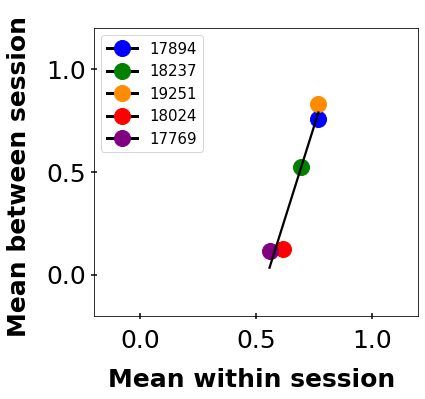

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024']    

ax.plot(within_session_dp['17894'], between_session_dp['17894'], color='black', marker='o', markersize=16, markerfacecolor='blue',
        markeredgecolor='blue',linewidth=3, label= '17894')
ax.plot(within_session_dp['18237'], between_session_dp['18237'], color='black', marker='o', markersize=16, markerfacecolor='green',
        markeredgecolor='green',linewidth=3, label= '18237')
ax.plot(within_session_dp['19251'], between_session_dp['19251'], color='black', marker='o', markersize=16, markerfacecolor='darkorange',
        markeredgecolor='darkorange',linewidth=3, label= '19251')
ax.plot(within_session_dp['18024'], between_session_dp['18024'], color='black', marker='o', markersize=16, markerfacecolor='red',
        markeredgecolor='red', linewidth=3, label= '18024')
ax.plot(within_session_dp['17769'], between_session_dp['17769'], color='black', marker='o', markersize=16, markerfacecolor='purple',
        markeredgecolor='purple', linewidth=3, label= '17769')


ax.set_ylabel('Mean between session ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean within session ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)

ax.legend(loc='upper left', prop={'size':15})


### this is an alternative way of calculating the square value 
### We controlled to make sure that the R2 agrees in both packages (skylearn vs. statsmodel)
### Both packeges give the exact same result which is a good indicator and control for us  

from sklearn.linear_model import LinearRegression
x1 = np.array(list(within_session_dp.values())).reshape((-1, 1))
y1 = np.array(list(between_session_dp.values()))
reg = LinearRegression().fit(x1, y1)
print(reg.score(x1, y1)) 


mod = sm.OLS(y1,sm.add_constant(x1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())
print(fii.pvalues[0])



sns.regplot(x1,y1,  ci=None, color= 'black')

plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)

#plt.savefig('corr_w_b__dp', dpi=300, bbox_inches='tight')

# Part 3: Comparisons across different sessions 

- these analysis are not in the paper but a reviewer wanted us to show this 
- the following 6 cells create 2 GLMs that compare: 
  1. remapping across different rooms of day 1 vs. day 2 
  2. remapping across different vs. repeated rooms 

In [14]:
animal_list = ['17894', '18237', '19251', '17769','18024']     #animals 
infile_list = {}                                               #Rate map corr of each animal in dict 

for an in animal_list:
    infile = open('rate_map_allsession_final_' + an,'rb')     #import the correct rate map correlation data 
    infile_list[an] = pickle.load(infile)
    infile.close()

infile_list['17769'][0][:] = np.nan                           #Remove the missing data                                                                                                                
infile_list['17769'][:,0] = np.nan    

diff_ind_d1 = {0: list(range(1,13)),                          #Defining indeces that correspind to different session comparisons day 1 
                1: list(range(3,11)) + [13],                  #0=F1 ... 27= F2*
                2: list(range(3,11)) + [13], 
                3: list(range(5,14)), 
                4: list(range(5,14)), 
                5: list(range(7,14)), 
                6: list(range(7,14)), 
                7: list(range(9,14)), 
                8: list(range(9,14)), 
                9: list(range(11,14)), 
                10: list(range(11,14)), 
                11: [13], 
                12: [13]}

diff_corr_dict_all_d1 = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for day 1 different correlation coefficients Keys:animal,values:corr_coeff 

for animal in animal_list:                                                           #For each animal 
    for x in diff_ind_d1:                                                            #For each session 
        for y in diff_ind_d1[x]:                                                     #For each other session
            diff_corr_dict_all_d1[animal].append(infile_list[animal][x][y])          #Add the corr coeff to the dict 


diff_ind_d2 = {14: list(range(15,27)),                                       #Defining indeces that correspind todifferent session comparisons day 2
                15: list(range(17,25)) + [27],                                #0=F1, 1=N1, 2=, 27= F2*
                16: list(range(17,25)) + [27], 
                17: list(range(19,28)), 
                18: list(range(19,28)), 
                19: list(range(21,28)), 
                20: list(range(21,28)), 
                21: list(range(23,28)), 
                22: list(range(23,28)), 
                23: list(range(25,28)), 
                24: list(range(25,28)), 
                25: [27], 
                26: [27]}

diff_corr_dict_all_d2 = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for day 2 different correlation coefficients Keys:animal,values:corr_coeff

for animal in animal_list:                                                           #For each animal 
    for x in diff_ind_d2:                                                            #For each session 
        for y in diff_ind_d2[x]:                                                     #For each other session
            diff_corr_dict_all_d2[animal].append(infile_list[animal][x][y])          #Add the corr coeff to the dict 




In [15]:
mean_diff_corr_dict_all_d1 = {}
mean_diff_corr_dict_all_d2 = {}


for animal in animal_list:
    mean_diff_corr_dict_all_d1[animal] = np.nanmean(diff_corr_dict_all_d1[animal])   #nan-mean because of 17769
for animal in animal_list:
    mean_diff_corr_dict_all_d2[animal] = np.nanmean(diff_corr_dict_all_d2[animal])

yer_d1_d2 = []
    

for animal in animal_list:
    yer_d1_d2.append(np.std(diff_corr_dict_all_d2[animal])/np.sqrt(len(diff_corr_dict_all_d2[animal])))
    
    
print(mean_diff_corr_dict_all_d1)


{'17894': 0.007768818046699187, '18237': 0.00020157644345300576, '19251': 0.007763110405806675, '17769': -0.0008792571993999956, '18024': -0.0047841704004495346}


0.03479451682293755
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.287    
Dependent Variable: y                AIC:                -27.7161  
Date:               2021-12-09 16:00 BIC:                -28.4972  
No. Observations:   5                Log-Likelihood:     15.858    
Df Model:           1                F-statistic:        0.1081    
Df Residuals:       3                Prob (F-statistic): 0.764     
R-squared:          0.035            Scale:              0.00017161
----------------------------------------------------------------------
           Coef.     Std.Err.      t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const      0.0068      0.0063    1.0759    0.3608    -0.0133    0.0269
x1         0.3868      1.1762    0.3289    0.7639    -3.3565    4.1301
-------------------------------------------------------------------
Omnibus:               nan     

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x7fe45132ba90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

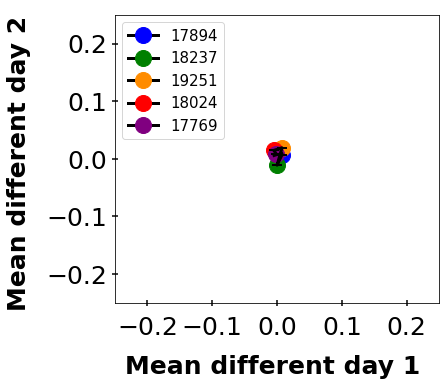

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024', '17769']    
colors = ['blue', 'green', 'darkorange', 'red', 'purple']

yer = []


i = 0
for a in animals: 
    ax.plot(mean_diff_corr_dict_all_d1[a], mean_diff_corr_dict_all_d2[a], color='black', marker='o', markersize=16, markerfacecolor=colors[i],
        markeredgecolor=colors[i],linewidth=3, label= a)
    i=i+1
    
(_, caps, _) = ax.errorbar([mean_diff_corr_dict_all_d1['17894'],
                            mean_diff_corr_dict_all_d1['18237'],
                            mean_diff_corr_dict_all_d1['19251'], 
                            mean_diff_corr_dict_all_d1['18024'], 
                            mean_diff_corr_dict_all_d1['17769']],
                             
                            [mean_diff_corr_dict_all_d2['17894'],
                            mean_diff_corr_dict_all_d2['18237'],
                            mean_diff_corr_dict_all_d2['19251'], 
                            mean_diff_corr_dict_all_d2['18024'], 
                            mean_diff_corr_dict_all_d2['17769']], 
                                   color='black',linewidth=3, yerr=yer_d1_d2, elinewidth = 1.5, uplims=True, lolims=True)
for cap in caps:
    cap.set_markeredgewidth(2)
    cap.set_marker('_')
    cap.set_markersize(10)

#ax.set_title('Mean RMC of within vs. between sessions', size=16, fontweight='bold', pad = 25 )
ax.set_ylabel('Mean different day 2 ',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean different day 1 ',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)
#ax.set_ylim(5,15)
ax.legend(loc='upper left', prop={'size':15})


from sklearn.linear_model import LinearRegression
x1 = np.array(list(mean_diff_corr_dict_all_d1.values())).reshape((-1, 1))
y1 = np.array(list(mean_diff_corr_dict_all_d2.values()))
reg = LinearRegression().fit(x1, y1)
print(reg.score(x1, y1))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(x1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())




sns.regplot(x1,y1,  ci=None, color= 'black')

plt.xlim(-0.25,0.25)
plt.ylim(-0.25,0.25)
plt.xticks([-0.2,-0.1,0,0.1,0.2])
#plt.yticks([0,0.1,0.2,0.3,0.4,0.5])
#plt.savefig('corr_diff_day1_day2', dpi=300, bbox_inches='tight')


In [17]:
animal_list = ['17894', '18237', '19251', '17769','18024']     #animals 
infile_list = {}                                               

for an in animal_list:
    infile = open('rate_map_allsession_final_' + an,'rb')     #import the correct rate map correlation data 
    infile_list[an] = pickle.load(infile)
    infile.close()

infile_list['17769'][0][:] = np.nan                           #Remove the missing data                                                                                                                
infile_list['17769'][:,0] = np.nan    

diff_ind_all = {0: list(range(1,13))+ list(range(15,27)),     #Defining indeces that correspind to all different session comparisons
                1: list(range(3,11)) + [13]+ list(range(14,28)),        #0=F1 ... 27= F2*
                2: list(range(3,11)) + [13]+ list(range(14,28)), 
                3: list(range(5,14))+ list(range(14,28)), 
                4: list(range(5,14))+ list(range(14,28)), 
                5: list(range(7,14))+list(range(14,28)), 
                6: list(range(7,14))+list(range(14,28)), 
                7: list(range(9,14))+list(range(14,28)), 
                8: list(range(9,14))+list(range(14,28)), 
                9: list(range(11,14))+list(range(14,28)), 
                10: list(range(11,14))+list(range(14,28)), 
                11: [13]+list(range(14,28)), 
                12: [13]+list(range(14,28)),
                14: list(range(15,27)),                                       
                15: list(range(17,25)) + [27],                                     
                16: list(range(17,25)) + [27], 
                17: list(range(19,28)), 
                18: list(range(19,28)), 
                19: list(range(21,28)), 
                20: list(range(21,28)), 
                21: list(range(23,28)), 
                22: list(range(23,28)), 
                23: list(range(25,28)), 
                24: list(range(25,28)), 
                25: [27], 
                26: [27]}

diff_corr_dict_all = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for all different session RMCs

for animal in animal_list:                                                        #For each animal 
    for x in diff_ind_all:                                                        #For each session 
        for y in diff_ind_all[x]:                                                 #For each other session
            diff_corr_dict_all[animal].append(infile_list[animal][x][y])          #Add the corr coeff to the dict 


rep_ind = {0:  [13,14,27],                                     #Defining indeces that correspind to repeated session comparisons
         13: [14,27],                                          #0=F1...13=F1*, 14=F2...27= F2*
         14: [27],
         1:  [11,12],                                          #Defining indeces that correspind to the correlation coeff for rep. of N1 
         2:  [11,12], 
          5:  [25,26],                                         #Defining indeces that correspind to the correlation coeff for rep. of N6 
         16:  [25,26]}

rep_corr_dict_all = {'17894': [],'18237': [],'19251':[],'17769':[],'18024':[]}   #Define dict for all repeated session RMCs 

for animal in animal_list:                                                         #For each animal 
    for x in rep_ind:                                                              #For each session 
        for y in rep_ind[x]:                                                       #For each other session
            rep_corr_dict_all[animal].append(infile_list[animal][x][y])            #Add the corr coeff to the dict 

In [18]:
mean_diff_corr_dict_all = {}
mean_rep_corr_dict_all = {}


for animal in animal_list:
    mean_diff_corr_dict_all[animal] = np.nanmean(diff_corr_dict_all[animal])   #nan-mean because of 17769
for animal in animal_list:
    mean_rep_corr_dict_all[animal] = np.nanmean(rep_corr_dict_all[animal])

yer_diff_rep = []
    

for animal in animal_list:
    yer_diff_rep.append(np.nanstd(diff_corr_dict_all[animal])/np.sqrt(len(diff_corr_dict_all[animal])))
        
print(mean_diff_corr_dict_all)

{'17894': 0.0037575173381721666, '18237': -0.0005079312860054798, '19251': 0.004967664232064003, '17769': 0.006408126702248391, '18024': 0.007412675458482642}


0.04636663492915605
                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.272    
Dependent Variable: y                AIC:                -40.9939  
Date:               2021-12-09 16:04 BIC:                -41.7750  
No. Observations:   5                Log-Likelihood:     22.497    
Df Model:           1                F-statistic:        0.1459    
Df Residuals:       3                Prob (F-statistic): 0.728     
R-squared:          0.046            Scale:              1.2058e-05
----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const     0.0056      0.0035     1.6161    0.2045    -0.0054    0.0166
x1       -0.0056      0.0145    -0.3819    0.7280    -0.0518    0.0407
-------------------------------------------------------------------
Omnibus:               nan     

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fe4514e9700>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

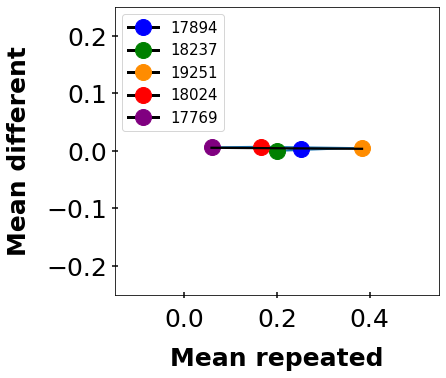

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.75,1])
animals = ['17894', '18237', '19251', '18024', '17769']    
colors = ['blue', 'green', 'darkorange', 'red', 'purple']


i = 0
for a in animals: 
    ax.plot(mean_rep_corr_dict_all[a], mean_diff_corr_dict_all[a], color='black', marker='o', markersize=16, markerfacecolor=colors[i],
        markeredgecolor=colors[i],linewidth=3, label= a)
    i=i+1
    
(_, caps, _) = ax.errorbar([mean_rep_corr_dict_all['17894'],
                            mean_rep_corr_dict_all['18237'],
                            mean_rep_corr_dict_all['19251'], 
                            mean_rep_corr_dict_all['18024'], 
                            mean_rep_corr_dict_all['17769']],
                             
                            [mean_diff_corr_dict_all['17894'],
                            mean_diff_corr_dict_all['18237'],
                            mean_diff_corr_dict_all['19251'], 
                           mean_diff_corr_dict_all['18024'], 
                            mean_diff_corr_dict_all['17769']], 
                                 yerr=yer_diff_rep, elinewidth = 1.5, barsabove=True)
for cap in caps:#
    cap.set_markeredgewidth(2)
    cap.set_marker('_')
    cap.set_markersize(10)


ax.set_ylabel('Mean different',size=25, fontweight='bold', labelpad = 15)
ax.set_xlabel('Mean repeated',size=25, fontweight='bold', labelpad = 15)
ax.tick_params(axis='y',length = 6, width= 1.5, direction='inout', labelsize=25, pad=5)
ax.tick_params(axis='x',length = 6, width= 1.5, direction='inout', labelsize=25, pad=10)

ax.legend(loc='upper left', prop={'size':15})


from sklearn.linear_model import LinearRegression
x1 = np.array(list(mean_rep_corr_dict_all.values())).reshape((-1, 1))
y1 = np.array(list(mean_diff_corr_dict_all.values()))
reg = LinearRegression().fit(x1, y1)
print(reg.score(x1, y1))

import statsmodels.api as sm
mod = sm.OLS(y1,sm.add_constant(x1))
fii = mod.fit()
p_values = fii.summary2().tables[1]
print(fii.summary2())




sns.regplot(x1,y1,  ci=None, color= 'black')

plt.xlim(-0.15,0.55)
plt.ylim(-0.25,0.25)
#plt.xticks([-0.5,-0.25,0,0.25,0.5])
plt.yticks([0,0.2,-0.2,0.1,-0.1])
#plt.savefig('corr_rep_diff_all', dpi=300, bbox_inches='tight')

# Part 3: Time analysis 

- as requested by some of the reviewers we performed three different time analysis
- the goal of all three analyses was to control for the effect of the passge of time in remapping

In [33]:
animal_list = ['17894', '18237', '19251', '17769', '18024']  #List of animals we have data from 

thresholds_all_animals = {}                                  #Dict of all animal's thresholds data 
                                                             #key 1 = animal, key 2 = session, value = Threshold_classification
                                                       
for animal in animal_list:                                   #for each animal .....
    infile = open('threshold_n_' + animal,'rb')              #import the correct data
    thresholds_all_animals[animal] = pickle.load(infile)
    infile.close()    

# Time Control Version 1

In [34]:
one_a = {"F1": 'N1!',                                       #Defining sessions that are one session apart 
        'N1': 'N2',                                          
        'N1!': 'N2!', 
        'N2': 'N3', 
         'N2!': 'N3!', 
         'N3': 'N4', 
        'N3!': 'N4!', 
        'N4': 'N5', 
        'N4!': 'N5!', 
        'N5': 'N1*', 
        'N5!': 'N1*!', 
        'N1*': 'F1*',
        'F2': 'N6!',                                     
        'N6': 'N7',                                          
        'N6!': 'N7!', 
        'N7': 'N8', 
        'N7!': 'N8!', 
        'N8': 'N9', 
        'N8!':'N9!', 
        'N9': 'N10', 
        'N9!': 'N10!', 
        'N10': 'N6*', 
        'N10!': 'N6*!', 
        'N6*': 'F2*'}

two_a = {"F1": 'N2',                                       #Defining sessions that are two session apart 
        'N1': 'N2!',                                          
        'N1!': 'N3', 
        'N2': 'N3!', 
        'N2!': 'N4', 
        'N3': 'N4!', 
        'N3!': 'N5', 
        'N4': 'N5!', 
        'N4!': 'N1*', 
        'N5': 'N1*!', 
        'N5!':'F1*', 
        'F2': 'N7',                                     
        'N6': 'N7!',                                          
        'N6!': 'N8', 
        'N7': 'N8!', 
        'N7!': 'N9', 
        'N8': 'N9!', 
        'N8!': 'N10', 
        'N9':'N10!', 
        'N9!': 'N6*', 
        'N10': 'N6*!', 
        'N10!': 'F2*'}

three_a = {"F1": 'N2!',                                       #Defining sessions that are three session apart 
                'N1': 'N3',                                          
                'N1!': 'N3!', 
                'N2': 'N4', 
                'N2!': 'N4!', 
                'N3': 'N5', 
                'N3!': 'N5!', 
                'N4': 'N1*', 
                'N4!': 'N1*!', 
                'N5': 'F1*',  
                'F2': 'N7!',                                     
                'N6': 'N8',                                          
                'N6!': 'N8!', 
                'N7': 'N9', 
                'N7!': 'N9!', 
                'N8': 'N10', 
                'N8!': 'N10!', 
                'N9': 'N6*', 
                'N9!': 'N6*!', 
                'N10': 'F2*'}
four_a = {"F1": 'N3',                                       #Defining sessions that are four session apart 
                'N1': 'N3!',                                          
                'N1!': 'N4', 
                'N2': 'N4!', 
                'N2!': 'N5', 
                'N3': 'N5!', 
                'N3!': 'N1*', 
                'N4': 'N1*!', 
                'N4!': 'F1*',   
                'F2': 'N8',                                     
                'N6': 'N8!',                                          
                'N6!': 'N9', 
                'N7': 'N9!', 
                'N7!': 'N10', 
                'N8': 'N10!', 
                'N8!': 'N6*', 
                'N9': 'N6*!', 
                'N9!': 'F2*'}

five_a = {"F1": 'N3!',                                       #Defining sessions that are five session apart 
                'N1': 'N4',                                          
                'N1!': 'N4!', 
                'N2': 'N5', 
                'N2!': 'N5!', 
                'N3': 'N1*', 
                'N3!': 'N1*!', 
                'N4': 'F1*',    
                'F2': 'N8!',                                     
                'N6': 'N9',                                          
                'N6!': 'N9!', 
                'N7': 'N10', 
                'N7!': 'N10!', 
                'N8': 'N6*', 
                'N8!': 'N6*!', 
                'N9': 'F2*'}


one_a_dict = {'17894': {'a_a':[], 'a_b': [], 'b_b':[]},
              '18237': {'a_a':[], 'a_b': [], 'b_b':[]},
              '19251':{'a_a':[], 'a_b': [], 'b_b':[]},
              '17769':{'a_a':[], 'a_b': [], 'b_b':[]},
              '18024':{'a_a':[], 'a_b': [], 'b_b':[]}}

for animal in animal_list:
    for x in one_a:
        y = one_a[x]
        one_a_dict[animal]['a_a'].append(threshold_counter(x,y,animal,thresholds_all_animals)[1])
        one_a_dict[animal]['a_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[2])
        one_a_dict[animal]['b_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[3])
    
two_a_dict = {'17894': {'a_a':[], 'a_b': [], 'b_b':[]},
              '18237': {'a_a':[], 'a_b': [], 'b_b':[]},
              '19251':{'a_a':[], 'a_b': [], 'b_b':[]},
              '17769':{'a_a':[], 'a_b': [], 'b_b':[]},
              '18024':{'a_a':[], 'a_b': [], 'b_b':[]}}
for animal in animal_list:
    for x in two_a:
        y = two_a[x]
        two_a_dict[animal]['a_a'].append(threshold_counter(x,y,animal,thresholds_all_animals)[1])
        two_a_dict[animal]['a_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[2])
        two_a_dict[animal]['b_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[3])

        
three_a_dict = {'17894': {'a_a':[], 'a_b': [], 'b_b':[]},
              '18237': {'a_a':[], 'a_b': [], 'b_b':[]},
              '19251':{'a_a':[], 'a_b': [], 'b_b':[]},
              '17769':{'a_a':[], 'a_b': [], 'b_b':[]},
              '18024':{'a_a':[], 'a_b': [], 'b_b':[]}}
for animal in animal_list:
    for x in three_a:
        y = three_a[x]
        three_a_dict[animal]['a_a'].append(threshold_counter(x,y,animal,thresholds_all_animals)[1])
        three_a_dict[animal]['a_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[2])
        three_a_dict[animal]['b_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[3])



four_a_dict = {'17894': {'a_a':[], 'a_b': [], 'b_b':[]},
              '18237': {'a_a':[], 'a_b': [], 'b_b':[]},
              '19251':{'a_a':[], 'a_b': [], 'b_b':[]},
              '17769':{'a_a':[], 'a_b': [], 'b_b':[]},
              '18024':{'a_a':[], 'a_b': [], 'b_b':[]}}
for animal in animal_list:
    for x in four_a:
        y = four_a[x]
        four_a_dict[animal]['a_a'].append(threshold_counter(x,y,animal,thresholds_all_animals)[1])
        four_a_dict[animal]['a_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[2])
        four_a_dict[animal]['b_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[3])


        
five_a_dict = {'17894': {'a_a':[], 'a_b': [], 'b_b':[]},
              '18237': {'a_a':[], 'a_b': [], 'b_b':[]},
              '19251':{'a_a':[], 'a_b': [], 'b_b':[]},
              '17769':{'a_a':[], 'a_b': [], 'b_b':[]},
              '18024':{'a_a':[], 'a_b': [], 'b_b':[]}}
for animal in animal_list:
    for x in five_a:
        y = five_a[x]
        five_a_dict[animal]['a_a'].append(threshold_counter(x,y,animal,thresholds_all_animals)[1])
        five_a_dict[animal]['a_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[2])
        five_a_dict[animal]['b_b'].append(threshold_counter(x,y,animal,thresholds_all_animals)[3])

[0.5538251191569931, 0.7709752319109676, 0.820143551680264, 0.6989292203749242, 0.7678633873213471]
[0.6735650577979471, 0.8706557577872278, 0.943022074825831, 0.6314689918589731, 0.5676883905436458]
[1.4539710731663806, 1.476503181600146, 1.480190056674519, 1.6298237337417785, 1.3858798969040063]
[1.882151265505349, 1.9129060979287749, 2.215667771456133, 2.2698967692182683, 2.314119675481149]
[1.2242722706132787, 1.3539601597535469, 1.4553350129781117, 1.3748674957978215, 1.4456291882775474]


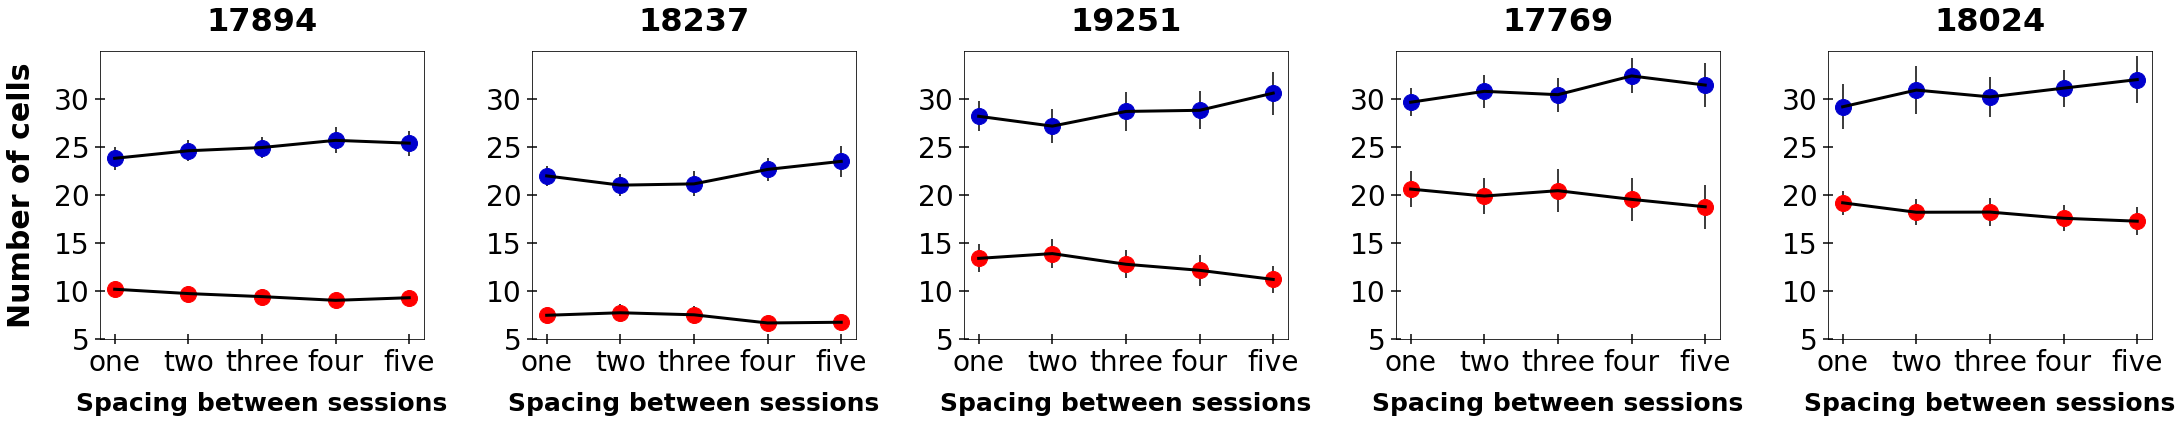

In [36]:
fig = plt.figure()
#fig.suptitle('Trend in RMCs', size=50, fontweight='bold', x=2.2, y=1.5)
ax = fig.add_axes([0,0,0.75,1])
ax1 = fig.add_axes([1,0,0.75,1])
ax2 = fig.add_axes([2,0,0.75,1])
ax3 = fig.add_axes([3,0,0.75,1])
ax4 = fig.add_axes([4,0,0.75,1])
axe = [ax,ax1,ax2,ax3,ax4]

data = [one_a_dict, two_a_dict, three_a_dict, four_a_dict, five_a_dict]
m = 'red'
r = 'mediumblue'


i=0
animals = ['17894', '18237', '19251', '17769','18024']

for a in animals: 
    yer = [np.nanstd(data[0][a]['a_a'])/np.sqrt(len(data[0][a]['a_a'])), np.nanstd(data[1][a]['a_a'])/np.sqrt(len(data[1][a]['a_a'])),
           np.nanstd(data[2][a]['a_a'])/np.sqrt(len(data[2][a]['a_a'])),np.nanstd(data[3][a]['a_a'])/np.sqrt(len(data[3][a]['a_a'])),
           np.nanstd(data[4][a]['a_a'])/np.sqrt(len(data[4][a]['a_a']))]
    print(yer)
    axe[i].plot('one', np.nanmean(data[0][a]['a_a']), color='black', marker='o', markersize=16, markerfacecolor=m,
    markeredgecolor=m,linewidth=3)
    axe[i].plot('two', np.nanmean(data[1][a]['a_a']), color='black', marker='o', markersize=16, markerfacecolor=m,
    markeredgecolor=m,linewidth=3)
    axe[i].plot('three', np.nanmean(data[2][a]['a_a']), color='black', marker='o', markersize=16, markerfacecolor=m,
    markeredgecolor=m,linewidth=3)
    axe[i].plot('four', np.nanmean(data[3][a]['a_a']), color='black', marker='o', markersize=16, markerfacecolor=m,
    markeredgecolor=m, linewidth=3)
    axe[i].plot('five', np.nanmean(data[4][a]['a_a']), color='black', marker='o', markersize=16, markerfacecolor=m,
    markeredgecolor=m, linewidth=3)
    (_, caps, _) = axe[i].errorbar(['one','two','three', 'four', 'five'], [np.nanmean(data[0][a]['a_a']), 
                                                                           np.nanmean(data[1][a]['a_a']), 
                                                                           np.nanmean(data[2][a]['a_a']), 
                                                                          np.nanmean(data[3][a]['a_a']), 
                                                                          np.nanmean(data[4][a]['a_a'])], 
                                   color='black',linewidth=3, yerr=yer, elinewidth = 1.5)
    for cap in caps:
        cap.set_markeredgewidth(2)
        cap.set_marker('_')
        cap.set_markersize(10)
        
        
        
    yer_2 = [np.nanstd(data[0][a]['a_b'])/np.sqrt(len(data[0][a]['a_b'])), np.nanstd(data[1][a]['a_b'])/np.sqrt(len(data[1][a]['a_b'])),
           np.nanstd(data[2][a]['a_b'])/np.sqrt(len(data[2][a]['a_b'])),np.nanstd(data[3][a]['a_b'])/np.sqrt(len(data[3][a]['a_b'])),
           np.nanstd(data[4][a]['a_b'])/np.sqrt(len(data[4][a]['a_b']))]
    axe[i].plot('one', np.nanmean(data[0][a]['a_b']), color='black', marker='o', markersize=16, markerfacecolor=r,
    markeredgecolor=r,linewidth=3)
    axe[i].plot('two', np.nanmean(data[1][a]['a_b']), color='black', marker='o', markersize=16, markerfacecolor=r,
    markeredgecolor=r,linewidth=3)
    axe[i].plot('three', np.nanmean(data[2][a]['a_b']), color='black', marker='o', markersize=16, markerfacecolor=r,
    markeredgecolor=r,linewidth=3)
    axe[i].plot('four', np.nanmean(data[3][a]['a_b']), color='black', marker='o', markersize=16, markerfacecolor=r,
    markeredgecolor=r, linewidth=3)
    axe[i].plot('five', np.nanmean(data[4][a]['a_b']), color='black', marker='o', markersize=16, markerfacecolor=r,
    markeredgecolor=r, linewidth=3)
    (_, caps, _) = axe[i].errorbar(['one','two','three', 'four', 'five'], [np.nanmean(data[0][a]['a_b']), 
                                                                           np.nanmean(data[1][a]['a_b']), 
                                                                           np.nanmean(data[2][a]['a_b']), 
                                                                          np.nanmean(data[3][a]['a_b']), 
                                                                          np.nanmean(data[4][a]['a_b'])], 
                                   color='black',linewidth=3, yerr=yer_2, elinewidth = 1.5)
    #for cap in caps:
       # cap.set_markeredgewidth(2)
      #  cap.set_marker('_')
       # cap.set_markersize(10)    
        
    axe[i].set_xlabel('Spacing between sessions', color='black', size=25, fontweight='bold', labelpad=15)
    axe[i].tick_params(length = 10, width= 1.5, direction='inout', labelsize=15, pad=5) 
    axe[i].tick_params(axis='x', length = 10, width= 1.5, direction='inout', labelsize=28, pad=5)
    axe[i].tick_params(axis='y', length = 10, width= 1.5, direction='inout', labelsize=28, pad=5)
    axe[i].set_title(a, size= 32, fontweight='bold', pad = 20 )
    axe[i].set_ylim(5, 35)
    axe[i].set_yticks([5,10,15,20,25,30])
        
    
    
    if i == 0: 
        axe[i].set_ylabel('Number of cells',size=30, fontweight='bold', labelpad = 18)
    #axe[i].set_ylim(data[0]-2*yer[0],data[3]+2*yer[3])
    i = i+1
    
    
#plt.savefig('time_analysis_2', dpi=300, bbox_inches='tight')

# Time control version 2

In [37]:
##### Defining sessions we are interested in 

t15_min = {1: 2,                                       #Defining repeate sessions that are 15 min apart                                         
           3: 4, 
           5: 6, 
           7: 8, 
           9: 10, 
          11: 12, 
          15: 16,                                          
          17: 18, 
          19: 20, 
          21:22, 
          23: 24, 
          25: 26}

t285_min = {1: 11,                                    #Defining repeated sessions that are 285 min apart                                          
           2: 12, 
           15: 25, 
            16:26}

t390_min = {0: 13,                                    #Defining repeated sessions that are 390 apart                                          
            14: 27}

t1440_min = {0: 14,                                   #Defining repeated sessions that are 1440 apart                                          
            13: 27}

t1050_min = {13:14}

t1830_min = {0:27}

animal_list = ['17894', '18237', '19251', '17769','18024']   
infile_list = {}                                              

for an in animal_list:
    infile = open('rate_map_allsession_final_' + an,'rb')     #import the correct rate map correlation data 
    infile_list[an] = pickle.load(infile)
    infile.close()

infile_list['17769'][0][:] = np.nan                           #Remove the missing data                                                                                                                
infile_list['17769'][:,0] = np.nan    

data = dict()
time_keys = ['0', '285', '390','1050', '1440', '1830']


for a in animal_list: 
    data[a] = dict()
    for t in time_keys: 
        data[a][t] = []
        
for a in animal_list: 
    for x in t15_min: 
        y = t15_min[x]
        data[a]['0'].append(infile_list[a][x][y])
        
    for x in t285_min: 
        y = t285_min[x]
        data[a]['285'].append(infile_list[a][x][y])
        
    for x in t390_min: 
        y = t390_min[x]
        data[a]['390'].append(infile_list[a][x][y])
        
    for x in t1050_min: 
        y = t1050_min[x]
        data[a]['1050'].append(infile_list[a][x][y])
        
    for x in t1440_min: 
        y = t1440_min[x]
        data[a]['1440'].append(infile_list[a][x][y])
        
    for x in t1830_min: 
        y = t1830_min[x]
        data[a]['1830'].append(infile_list[a][x][y])

<ipython-input-38-350ca0919aff>:41: RuntimeWarning: Mean of empty slice
  ax.plot([e,f],[np.nanmean(data[ani]['1440']),np.nanmean(data[ani]['1830'])], color=colors[ani],  label=ani)


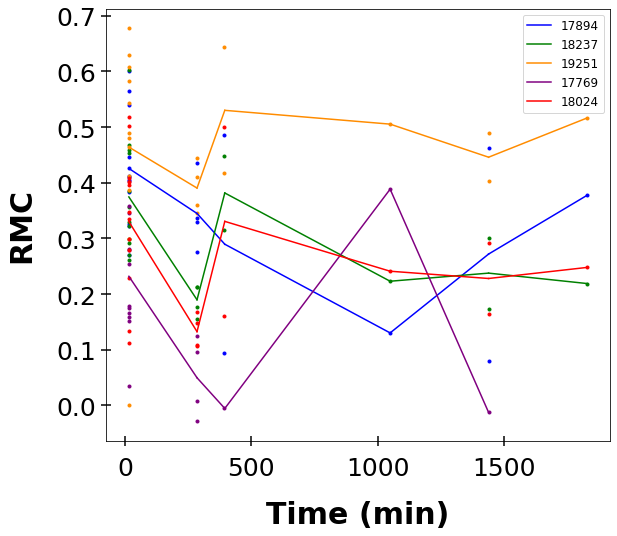

In [38]:
fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0,0,1,1])
colors = {'17894':'blue','18237':'green','19251':'darkorange','17769':'purple','18024': 'red'}

for a in animal_list: 
    ax.scatter(np.zeros(len(data[a]['0']))+15, data[a]['0'], color = colors[a], marker = '.')
    ax.scatter(np.zeros(len(data[a]['285']))+285, data[a]['285'], color = colors[a], marker = '.')
    ax.scatter(np.zeros(len(data[a]['390']))+390, data[a]['390'], color = colors[a], marker = '.')
    ax.scatter(np.zeros(len(data[a]['1050']))+1050, data[a]['1050'], color = colors[a], marker = '.')
    ax.scatter(np.zeros(len(data[a]['1440']))+1440, data[a]['1440'], color = colors[a], marker = '.')
    ax.scatter(np.zeros(len(data[a]['1830']))+1830, data[a]['1830'], color = colors[a], marker = '.')

    

    

#ax.set_xlim(0,2000)
#ax.set_xscale('log') 
#ax.set_xlim(0, 10**3.5)
ax.tick_params(axis='x',length = 10, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.tick_params(axis='y',length = 10, width= 1.5, direction='inout', labelsize=25, pad=5)

ax.set_ylabel('RMC', color='black', size=30, fontweight='bold', labelpad=20)
ax.set_xlabel('Time (min)', color='black', size=30, fontweight='bold', labelpad=20)




i=0
for ani in animal_list: 
    a = 15
    b = 285
    c = 395
    d = 1050
    e = 1440
    f = 1830
    ax.plot([a,b],[np.nanmean(data[ani]['0']),np.nanmean(data[ani]['285'])], color=colors[ani],  label=ani)
    ax.plot([b,c],[np.nanmean(data[ani]['285']),np.nanmean(data[ani]['390'])], color=colors[ani],  label=ani)
    ax.plot([c,d],[np.nanmean(data[ani]['390']),np.nanmean(data[ani]['1050'])], color=colors[ani],  label=ani)
    ax.plot([d,e],[np.nanmean(data[ani]['1050']),np.nanmean(data[ani]['1440'])], color=colors[ani],  label=ani)
    ax.plot([e,f],[np.nanmean(data[ani]['1440']),np.nanmean(data[ani]['1830'])], color=colors[ani],  label=ani)
    i=i+1
    
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), prop={'size':12})

#plt.savefig('time_analysis_rev', dpi=300, bbox_inches='tight')


In [39]:
animals = ['17894', '18237', '19251','18024', '17769']

i = 0
for a in animals:
    print(a)
    
    x = np.array([np.ones(len(data[a]['0']))*15,np.ones(len(data[a]['285']))*285, 
                 np.ones(len(data[a]['390']))*390, np.ones(len(data[a]['1050']))*1050, 
                 np.ones(len(data[a]['1440']))*1440, np.ones(len(data[a]['1830']))*1830]).reshape((-1, 1))
    
    one_x2   = np.array(data[a]['0']) 
    two_x2   = np.array(data[a]['285'])
    three_x2 = np.array(data[a]['390'])
    four_x2  = np.array(data[a]['1050'])
    five_x2  = np.array(data[a]['1440'])
    six_x2   = np.array(data[a]['1830'])
    x2_vec = np.hstack((one_x2, two_x2, three_x2,four_x2, five_x2, six_x2))
    mask = ~np.isnan(x2_vec)
    x2_vec = x2_vec[mask]
    y2_vec = np.hstack((15*np.ones(one_x2.shape),285*np.ones(two_x2.shape), 390*np.ones(three_x2.shape), 
                       1050*np.ones(four_x2.shape), 1440*np.ones(five_x2.shape), 1830*np.ones(six_x2.shape)))
    y2_vec = y2_vec[mask]
    
    
    mod = sm.OLS(y2_vec,sm.add_constant(x2_vec))
    fii = mod.fit()
    print(fii.summary2())

17894


<ipython-input-39-c63e03add299>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array([np.ones(len(data[a]['0']))*15,np.ones(len(data[a]['285']))*285,


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.093     
Dependent Variable: y                AIC:                340.0590  
Date:               2021-12-09 16:32 BIC:                342.2411  
No. Observations:   22               Log-Likelihood:     -168.03   
Df Model:           1                F-statistic:        3.160     
Df Residuals:       20               Prob (F-statistic): 0.0907    
R-squared:          0.136            Scale:              2.7730e+05
--------------------------------------------------------------------
          Coef.     Std.Err.     t     P>|t|     [0.025      0.975] 
--------------------------------------------------------------------
const     901.4598  326.0570   2.7647  0.0120    221.3169  1581.6027
x1      -1474.1972  829.2729  -1.7777  0.0907  -3204.0302   255.6357
-------------------------------------------------------------------
Omnibus:              16.753        Durbin-Watson:           

<ipython-input-39-c63e03add299>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array([np.ones(len(data[a]['0']))*15,np.ones(len(data[a]['285']))*285,
<ipython-input-39-c63e03add299>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x = np.array([np.ones(len(data[a]['0']))*15,np.ones(len(data[a]['285']))*285,
<ipython-input-39-c63e03add299>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this

# Time control version 3

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.268  
Dependent Variable: y                AIC:                -4.1325 
Date:               2021-12-09 16:34 BIC:                -4.9136 
No. Observations:   5                Log-Likelihood:     4.0662  
Df Model:           1                F-statistic:        0.1542  
Df Residuals:       3                Prob (F-statistic): 0.721   
R-squared:          0.049            Scale:              0.019187
-------------------------------------------------------------------
            Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
-------------------------------------------------------------------
const       0.2198     0.0958    2.2959   0.1054   -0.0849   0.5246
x1         -0.3607     0.9186   -0.3927   0.7208   -3.2841   2.5627
-----------------------------------------------------------------
Omnibus:               nan          Durbin-Watson:          2.738
Prob(Omnibus):   

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.YTick at 0x7fe451492bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

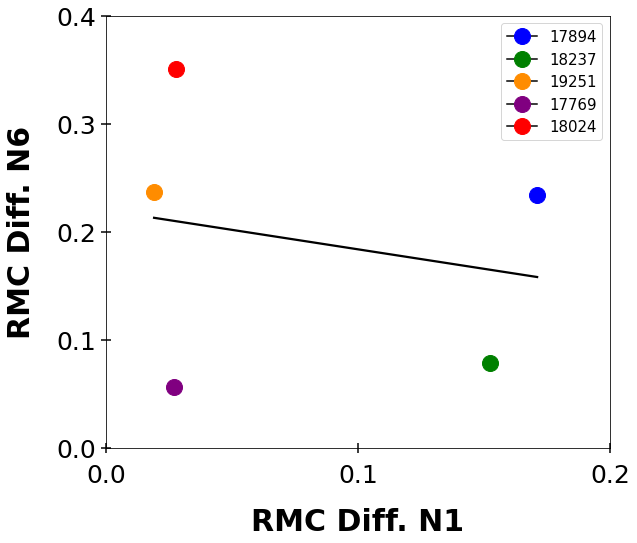

In [41]:
rmc_data  = infile_list.copy()

fig = plt.figure(figsize=(7,6))
ax = fig.add_axes([0,0,1,1])
colors = {'17894':'blue','18237':'green','19251':'darkorange','17769':'purple','18024': 'red'}

x = []
y = []

for a in animal_list:
    diff_n1  = rmc_data[a][1][2] - rmc_data[a][1][11]
    diff_n6  = rmc_data[a][15][16] - rmc_data[a][15][25]
    x.append(diff_n1)
    y.append(diff_n6)
    #ax.scatter(diff_n1, diff_n6, color = colors[a], marker = 'o', s=65, label =a)
    ax.plot(diff_n1, diff_n6, color='black', marker='o', markersize=16, markerfacecolor=colors[a],
        markeredgecolor=colors[a], label =a)
    
    
ax.tick_params(axis='x',length = 10, width= 1.5, direction='inout', labelsize=25, pad=10)
ax.tick_params(axis='y',length = 10, width= 1.5, direction='inout', labelsize=25, pad=5)

ax.set_ylabel('RMC Diff. N6', color='black', size=30, fontweight='bold', labelpad=20)
ax.set_xlabel('RMC Diff. N1', color='black', size=30, fontweight='bold', labelpad=20)

ax.legend(loc='upper right', prop={'size':15})

mod = sm.OLS(y,sm.add_constant(np.asarray(x).reshape((-1, 1))))
fii = mod.fit()
print(fii.summary2())


sns.regplot(x,y,  ci=None, color= 'black')
plt.xlim(-0.0,0.2)
plt.ylim(-0.0,0.4)
plt.xticks([0,0.1,0.2,])
plt.yticks([0,0.1,0.2,0.3,0.4])
#plt.savefig('time_analysis_rev_2', dpi=300, bbox_inches='tight')
